In [17]:
# Imports
import pandas as pd 
import random as rnd
from pathlib import Path
%matplotlib inline

In [18]:
# Bring in NBA game stats csv contains NBA team data from 2014 to 2018
nba_stats_csv = Path('../1. Data_Cleaning/nba_team_stats.csv')

# Read csv into a pandas Dataframe
game_stats = pd.read_csv(nba_stats_csv)
game_stats.tail()


,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
9835,78119,WAS,78,4/3/2018,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,4/5/2018,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,4/6/2018,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,4/10/2018,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18
9839,82119,WAS,82,4/11/2018,Away,ORL,L,92,101,33,...,22,27,0.815,6,42,20,6,7,16,27


In [3]:
# Generate list of teams
teams_filtered = game_stats.Team
teams_filtered = teams_filtered.drop_duplicates()
print(teams_filtered)

0       ATL
82      BOS
164     BRK
246     CHO
328     CHI
410     CLE
492     DAL
574     DEN
656     DET
738     GSW
820     HOU
902     IND
984     LAC
1066    LAL
1148    MEM
1230    MIA
1312    MIL
1394    MIN
1476    NOP
1558    NYK
1640    OKC
1722    ORL
1804    PHI
1886    PHO
1968    POR
2050    SAC
2132    SAS
2214    TOR
2296    UTA
2378    WAS
Name: Team, dtype: object


# User Selected Any Two Teams for S

In [4]:
# Set Variables, users select 2 teams from list above

team_1 = 'CHO'
team_2 = 'CHI'

In [5]:
# Create dataframes for two teams selected

# Team 1 dataframe
t1_df = game_stats[game_stats.Team == team_1]
#t1_df.head()

# Team 2 dataframe
t2_df = game_stats[game_stats.Team == team_2]
#t2_df.head()


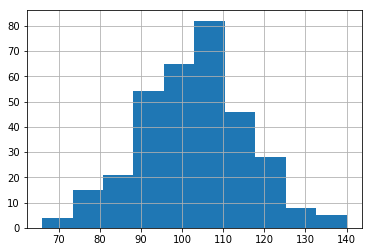

In [6]:
# Create histogram to look at points scored by Team 1
t1_df.TeamPoints.hist()

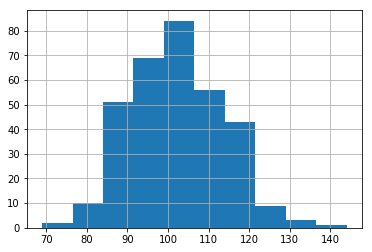

In [7]:
# Create histogram to look at points scored by Team 2
t2_df.TeamPoints.hist()

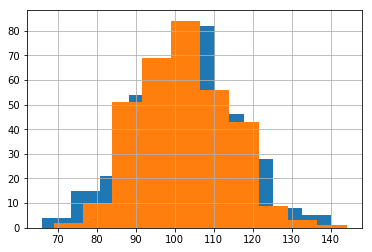

In [8]:
# Overlay points scored histograms
t1_df.TeamPoints.hist()
t2_df.TeamPoints.hist()

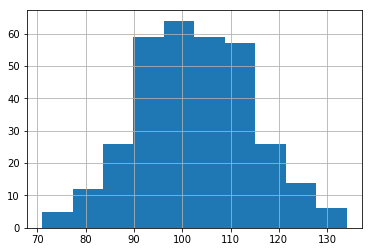

In [9]:
# Create histogram to look at points allowed by team 1
t1_df.OpponentPoints.hist()

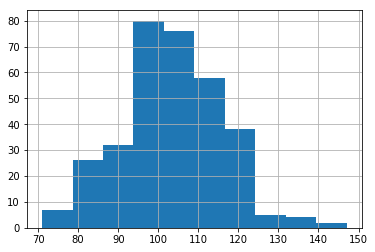

In [10]:
# Create histogram to look at points allowed by team 2
t2_df.OpponentPoints.hist()

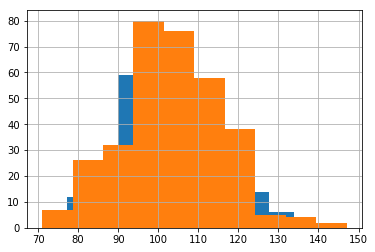

In [11]:
# Overlay histograms to look at points allowed by each team

t1_df.OpponentPoints.hist()
t2_df.OpponentPoints.hist()

In [12]:
# Calculate mean and standard deviation for team 1

t1_mean_pts = t1_df.TeamPoints.mean()
t1_std_pts = t1_df.TeamPoints.std()
t1_mean_opp_pts = t1_df.OpponentPoints.mean()
t1_std_opp_pts = t1_df.OpponentPoints.std()
print("Team 1 Points Mean ", t1_mean_pts)
print("Team 1 Points SD ", t1_std_pts)
print("Team 1 Opponent Points Mean ", t1_mean_opp_pts)
print("Team 1 Opponent Points SD ", t1_std_opp_pts)

Team 1 Points Mean  102.66768292682927
Team 1 Points SD  12.907667569182555
Team 1 Opponent Points Mean  102.66768292682927
Team 1 Opponent Points SD  11.828641112911331


In [13]:
# Calculate mean and standard deviation for team 2

t2_mean_pts = t2_df.TeamPoints.mean()
t2_std_pts = t2_df.TeamPoints.std()
t2_mean_opp_pts = t2_df.OpponentPoints.mean()
t2_std_opp_pts = t2_df.OpponentPoints.std()
print("Team 2 Points Mean ", t2_mean_pts)
print("Team 2 Points SD ", t2_std_pts)
print("Team 2 Opponent Points Mean ", t2_mean_opp_pts)
print("Team 2 Opponent Points SD ", t2_std_opp_pts)

Team 2 Points Mean  102.0579268292683
Team 2 Points SD  11.377038331367542
Team 2 Opponent Points Mean  103.32926829268293
Team 2 Opponent Points SD  12.490294583803225


In [14]:
# Create a mean and standard derivation normal distribuution and randomly sample from it using gaussian function

# To create simulated score sum the mean points scored and standard deviation of points scored for team 1 + mean points allowed and standard deviation of points allowed for team 2 and divide sum by 2 
def gameSim():
    T1_Score = (rnd.gauss(t1_mean_pts, t1_std_pts)+ rnd.gauss(t2_mean_opp_pts,t2_std_opp_pts))/2
    T2_Score = (rnd.gauss(t2_mean_pts, t2_std_pts)+ rnd.gauss(t1_mean_opp_pts,t1_std_opp_pts))/2
    if int(round(T1_Score)) > int(round(T2_Score)):
        return 1
    elif int(round(T1_Score)) < int(round(T2_Score)):
        return -1
    else: return 0

In [15]:
# create function to repeat the simulation for number of games selected

def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('Team 1 Win ', team1win/(team1win+team2win+tie),'%')
    print('Team 2 Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie Game, Free Basketball! ', tie/(team1win+team2win+tie), '%')
    return gamesout

In [16]:
gamesSim(100)

Team 1 Win  0.5 %
Team 2 Win  0.46 %
Tie Game, Free Basketball!  0.04 %


[-1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1]